# irisのデータを2次元に可視化する

In [13]:
# 前回のプログラムとほぼ同じため、前提は割愛する
# データのロード
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
RANDOM_SEED=71

# データの分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris.data[:,2:4], iris.target, random_state=RANDOM_SEED)

# パラメータ未設定での評価を行う
from sklearn.svm import SVC
model = SVC(kernel='linear',random_state=RANDOM_SEED)
model.fit(X_train, y_train)
print(model)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=71, shrinking=True,
  tol=0.001, verbose=False)


## mlxtendによる境界可視化(2次元まで可)
https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

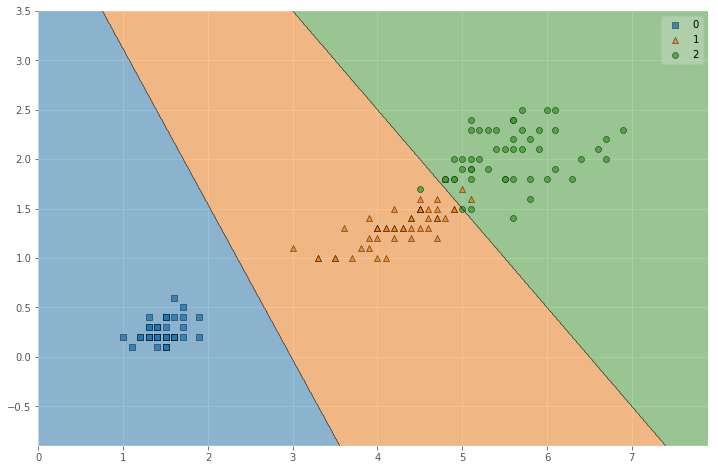

In [6]:

#分類結果を図示する
import matplotlib.pyplot as plt

# scikit-laernやmatplotlibに含まれない機能を含むPythonライブラリ
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
fig = plt.figure(figsize=(12,8))
plot_decision_regions(X_combined[:], y_combined, clf=model,  res=0.02)
plt.show()

## 可視化PKG seabornによる可視化(2次元)

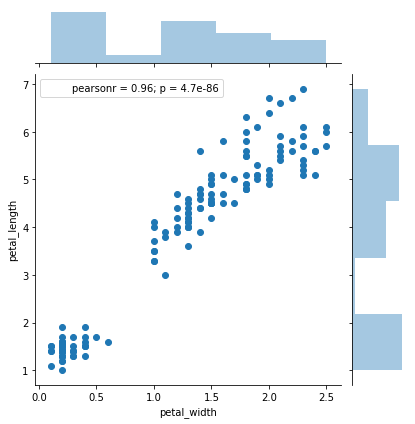

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

x = np.random.normal(size=100) #ランダムデータをnumpy arrayとして作る

iris = sns.load_dataset("iris")
sns.jointplot('petal_width', 'petal_length', data=iris)

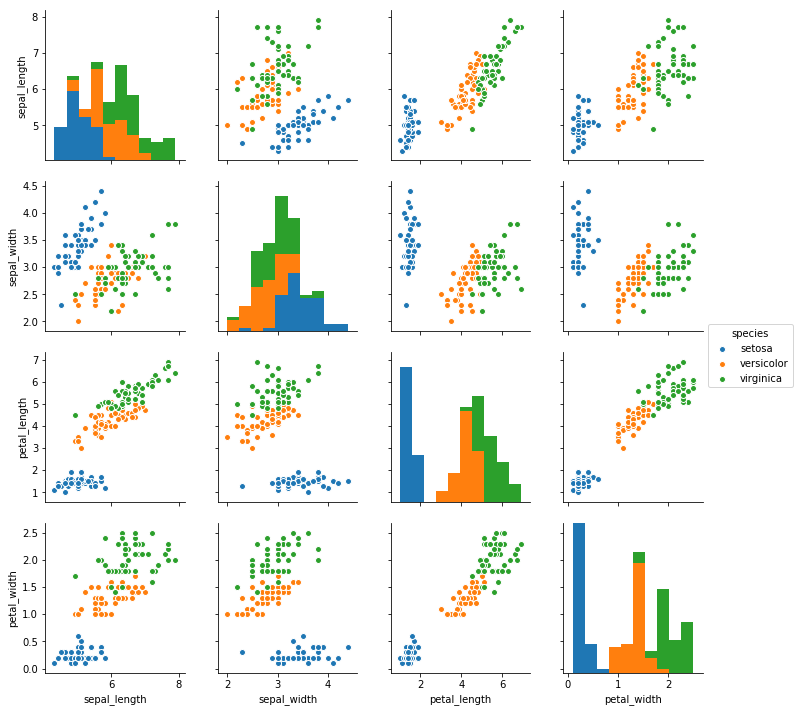

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species")

# irisのデータを3次元に可視化する

In [25]:
# 前回のプログラムとほぼ同じため、前提は割愛する
# データのロード
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
RANDOM_SEED=71

# データの分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris.data[:,1:4], iris.target, random_state=RANDOM_SEED)

# パラメータ未設定での評価を行う
from sklearn.svm import SVC
model = SVC(kernel='linear',random_state=RANDOM_SEED)
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=71, shrinking=True,
  tol=0.001, verbose=False)

<IPython.core.display.Javascript object>


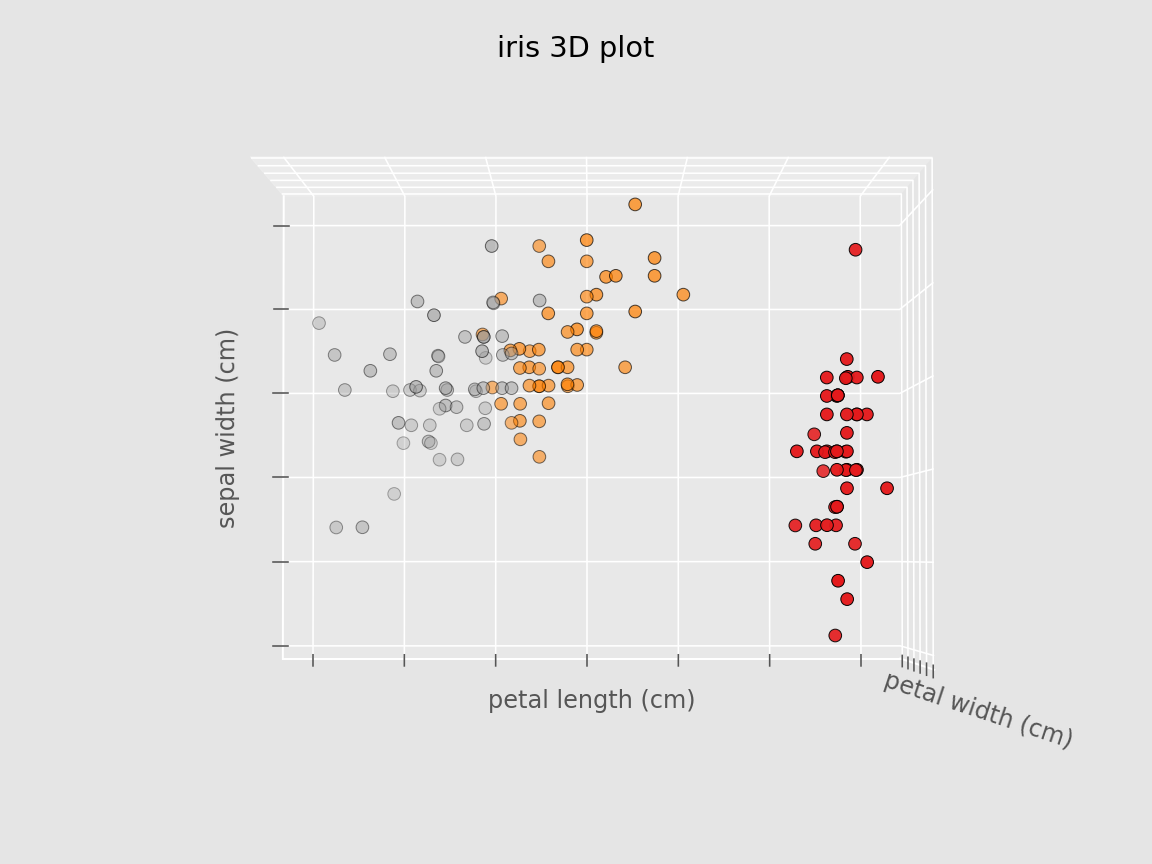

In [28]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
#X_reduced = PCA(n_components=3).fit_transform(iris.data)

X_data = iris.data[:,1:4]
ax.scatter(X_data[:, 0], X_data[:, 1], X_data[:, 2], c=iris.target,
           cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_title("iris 3D plot")
ax.set_xlabel(iris.feature_names[1])
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel(iris.feature_names[2])
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel(iris.feature_names[3])
ax.w_zaxis.set_ticklabels([])

plt.show()

<IPython.core.display.Javascript object>


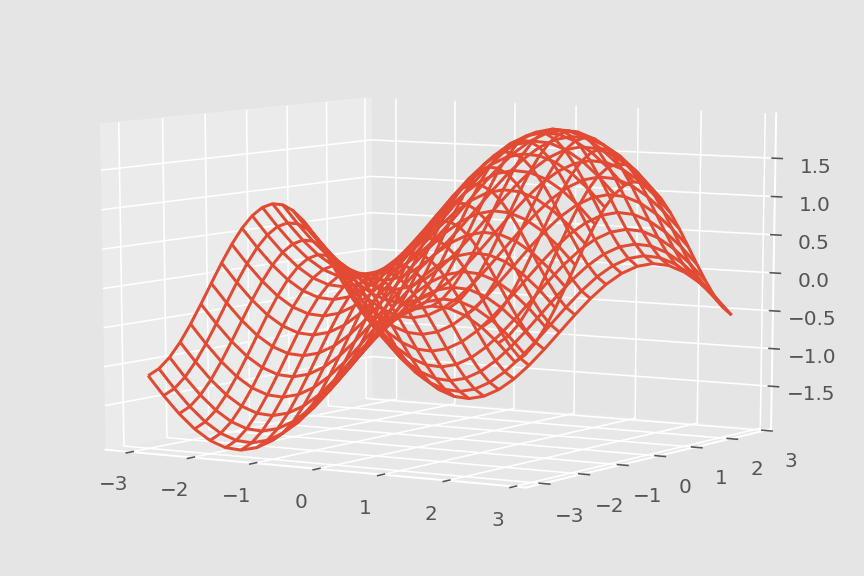

In [23]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-3, 3, 0.25)
y = np.arange(-3, 3, 0.25)
X, Y = np.meshgrid(x, y)
Z = np.sin(X)+ np.cos(Y)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X,Y,Z)

plt.show()

<IPython.core.display.Javascript object>


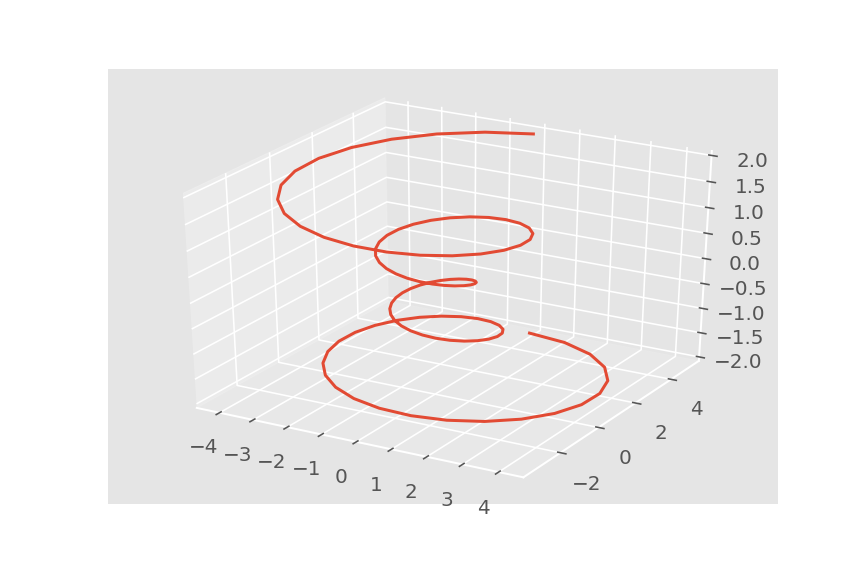

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    # <- 明示的には使わないが、インポートしておく必要がある。
# Notebook出力には次の１行が必要（%matplotlib inlineだとグラフを回転できない）
%matplotlib notebook

import numpy as np
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)

fig = plt.figure()
ax = fig.gca(projection='3d')    # <- axes3dをインポートしていないとエラーになる。
ax.plot(x, y, z)
plt.show()

In [31]:
%matplotlib inline

## iris(4次元)のデータを主成分分析(PCA)にて2次元に可視化する

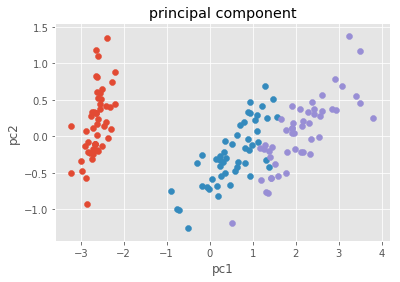

In [21]:
from sklearn import decomposition

#centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()

#2次元の主成分分析
pca = decomposition.PCA(n_components=2)
pca.fit(iris.data)
# 分析結果を元にデータセットを主成分に変換する
transformed = pca.transform(iris.data)

# 主成分をプロットする
for label in np.unique(iris.target):
    plt.scatter(transformed[iris.target == label, 0],
                transformed[iris.target == label, 1])
    plt.title('principal component')
    plt.xlabel('pc1')
    plt.ylabel('pc2')
plt.show()

## SVCでチューニングしたモデルを作成する

In [7]:
# データのロード
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
RANDOM_SEED=71

#グリッドサーチによるチューニング
scoring = "f1_macro"
param_grid = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001]},
    {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [0.001, 0.0001]},
    {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.001, 0.0001]}
    ]

# training set と test set の用意
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=RANDOM_SEED)

# グリッドサーチによる交差検証
from sklearn.svm import SVC
model = SVC()
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=4, return_train_score=True)
grid_search.fit(X_train, y_train)

print('Test set score: {}'.format(grid_search.score(X_test, y_test)))
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best cross-validation: {}'.format(grid_search.best_score_))

# 結果をdataframeに出す
import pandas as pd
df = pd.DataFrame(grid_search.cv_results_)
df_scored = df.sort_values(by=["rank_test_score"]
                          )[["params","mean_test_score","std_test_score","mean_fit_time"]]

df_scored.head(5)

Test set score: 0.9736842105263158
Best parameters: {'C': 1, 'kernel': 'linear'}
Best cross-validation: 0.9910714285714286


,params,mean_test_score,std_test_score,mean_fit_time
0,"{'C': 1, 'kernel': 'linear'}",0.991071,0.015465,0.000315
42,"{'C': 1000, 'gamma': 0.001, 'kernel': 'sigmoid'}",0.991071,0.015465,0.000284
1,"{'C': 10, 'kernel': 'linear'}",0.982143,0.017547,0.000351
11,"{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}",0.982143,0.017547,0.000356
10,"{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}",0.982143,0.018531,0.000301



## 複数次元のデータを2次元上で分類・可視化する
## 分類をする際の超平面を可視化する


[[0.27245439 0.36498838]]
[0.27245439 0.36498838]
[[ 0.23089692 -0.28232337]]
[ 0.23089692 -0.28232337]


(-16.467076500020582, 18.847037394803845)

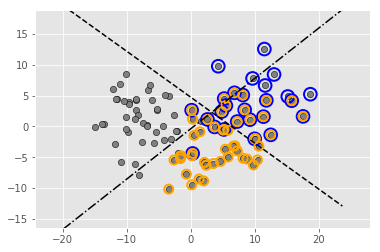

In [94]:
# 2次元の超平面を引く関数
def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    # get the separating hyperplane
    # coef_ は線形回帰の回帰変数パラメータ（w0、w1、w2）のリスト
    # intercept_は切片
    w = clf.coef_[0]
    print(clf.coef_)
    print(clf.coef_[0])
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)

## 複数ラベル分類問題生成
# ラベルの種類は n_classes
# 各サンプルは、平均で n_labels 個のラベルがついている
# allow_unlabeled を True にすると、どのラベルにも属さないサンプルの生成を許して生成する。
# Xは20次元の配列, Yはn_classes次元の0,1が並ぶ
from sklearn.datasets import make_multilabel_classification
X, Y = make_multilabel_classification(n_features=4, #Xの次元数(defaultは20次元)
                                      n_classes=2, n_labels=1, #Yの次元数
                                      allow_unlabeled=True,
                                      random_state=1)

from sklearn.decomposition import PCA
X = PCA(n_components=2).fit_transform(X)

min_x = np.min(X[:, 0])
max_x = np.max(X[:, 0])

min_y = np.min(X[:, 1])
max_y = np.max(X[:, 1])

#model = SVC(C=1, kernel="linear", random_state=RANDOM_SEED)
#model.fit(X_train, y_train)

from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
classif = OneVsRestClassifier(SVC(kernel='linear'))
classif.fit(X, Y)

# 超平面を引く
## estimators_ はmodelオブジェクトのリスト
plot_hyperplane(classif.estimators_[0], min_x, max_x, 'k--', 'Boundary\nfor class 1')
plot_hyperplane(classif.estimators_[1], min_x, max_x, 'k-.', 'Boundary\nfor class 2')

# 二次元のデータY[0 0]を[0][1]列目で分割し、要素が1のIndex列を返す
zero_class = np.where(Y[:, 0])
one_class = np.where(Y[:, 1])

## 灰色の円、青灰の円、オレンジ灰の円、青オレンジ灰の円の４種類のプロットをする
# 主成分1と2でプロット、灰色で小さい円
plt.scatter(X[:, 0], X[:, 1], s=40, c='gray', edgecolors=(0, 0, 0))

# ラベルが0のものに対して、主成分1と2でプロット、少し大きい円で青色
plt.scatter(X[zero_class, 0], X[zero_class, 1], s=160, edgecolors='b',
            facecolors='none', linewidths=2, label='Class 1')

# ラベルが0のものに対して、主成分1と2でプロット、少し大きい円でオレンジ色
plt.scatter(X[one_class, 0], X[one_class, 1], s=80, edgecolors='orange',
            facecolors='none', linewidths=2, label='Class 2')

# 描画範囲を絞って見やすくする
plt.xlim(min_x - .5 * max_x, max_x + .5 * max_x)
plt.ylim(min_y - .5 * max_y, max_y + .5 * max_y)

### iris(4次元)のデータを主成分分析(PCA)にて2次元に可視化し、
### 超平面を可視化する

In [100]:
# 2次元の超平面を引く関数
# もともと参考にしたモデルは、一つの平面毎に線を引いていたが、
# 1つのモデルの中に複数の平面があるため、まとめて可視化するように改造
def plot_hyperplane(clf, min_x, max_x, linestyle):
    # get the separating hyperplane
    # coef_ は線形回帰の回帰変数パラメータ（w0、w1、w2）のリスト
    # intercept_は切片
    for i in len(clf.coef_):
        w = clf.coef_[i]
        a = -w[0] / w[1]
        # make sure the line is long enough
        xx = np.linspace(min_x - 5, max_x + 5)
        yy = a * xx - (clf.intercept_[i]) / w[1]
        plt.plot(xx, yy, linestyle)

#plot_hyperplane(classif.estimators_[0], min_x, max_x, 'k--', 'Boundary\nfor class 1')

# プロットするデータの読み込み
X = iris.data
Y = iris.target

# 主成分分析 4->2次元
from sklearn.decomposition import PCA
X = PCA(n_components=2).fit_transform(X)

min_x = np.min(X[:, 0])
max_x = np.max(X[:, 0])
min_y = np.min(X[:, 1])
max_y = np.max(X[:, 1])

model = SVC(C=1, kernel="linear", random_state=RANDOM_SEED)
model.fit(X, Y)

# OneVsRestClassifierは多クラスの線形分類器
from sklearn.multiclass import OneVsRestClassifier
classif = OneVsRestClassifier(SVC(kernel='linear'))
classif.fit(X, Y)

# 超平面を引く
fig = plt.figure(figsize=(8, 6))
plot_hyperplane(model, min_x, max_x, 'k--')

# ラベル毎に分類する(['setosa' 'versicolor' 'virginica'])
setosa_class = np.where(Y[:]==0)
versicolor_class = np.where(Y[:]==1)
virginica_class = np.where(Y[:]==2)

## 灰色の円、青灰の円、オレンジ灰の円、青オレンジ灰の円の４種類のプロットをする
# 主成分1と2でプロット、灰色で小さい円
plt.scatter(X[:, 0], X[:, 1], s=40, c='gray', edgecolors=(0, 0, 0))

# ラベルが0のものに対して、主成分1と2でプロット、少し大きい円で青色
plt.scatter(X[setosa_class, 0], X[setosa_class, 1], s=80, edgecolors='b',
            facecolors='none', linewidths=2, label='Class 1')

# ラベルが0のものに対して、主成分1と2でプロット、少し大きい円でオレンジ色
plt.scatter(X[versicolor_class, 0], X[versicolor_class, 1], s=80, edgecolors='green',
            facecolors='none', linewidths=2, label='Class 2')

# ラベルが0のものに対して、主成分1と2でプロット、少し大きい円でオレンジ色
plt.scatter(X[virginica_class, 0], X[virginica_class, 1], s=80, edgecolors='red',
            facecolors='none', linewidths=2, label='Class 2')

# 描画範囲を絞って見やすくする
plt.xlim(min_x - .5 * max_x, max_x + .5 * max_x)
plt.ylim(min_y - .5 * max_y, max_y + .5 * max_y)


TypeError: 'int' object is not iterable